# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9383 Камзолов Никита, вариант 92.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоритические положения

**1. Бинарный метод возведения в степень.**

Бинарный метод возведения в степень - это алгоритм, который позволяет возводить любое число $x$ в степень $n \in N$. Сложность этого алгоритма $O(nlog(n))$: 
<ol> 
<li> Степень, в которую нужно перевести число представляется в двоичном виде. </li>
<li> Отбрасывается первый бит получившегося числа, так как он всегда равен единице. </li>
<li> Проходимся по битам слева направо и, если бит равен единице, то текущее число возводится в квадрат, а также умножается на $x$. Если же бит равен нулю, то текущее число просто умножается на $x$. </li>
</ol>
Количество операций умножения для получения результата возведения в степень рассчитывается по формуле: $\lambda(n) + \nu(n) - 1$, где $\lambda(n) = \lfloor lb(n) \rfloor$ и $\nu(n)$ - количество единиц в двоичной записи числа.

**2. Метод множителей**

Метод множителей - это алгоритм, который также позволяет возводить любое число $x$ в степень $n \in N$:
<ol>
<li>Находим $i$ - наименьший простой множитель числа $n$, а также получаем  $j$, такое, что $j*i = n$. </li>
<li>Далее возводим число $x$ в степень $i$, а затем полученное число уже возводим в степень $j$. </li>
<li>Если же $n$ является простым числом, то мы вычисляем $x^{n-1}$, а затем домножаем это число на $x$.</li>
</ol>
Таким образом, идея алгоритма заключается в том, что если мы можем получить $x^i$ за $m$ операций, а $y^j$ за $k$ операций, то мы можем получить $x^{i*j}$ за $m+k$ операций.

**3. Аддитивная цепочка**

Аддитивной цепочкой для $n \in N$ называется последовательность $1=a_0, a_1, a_2, ... , a_m = n$, где $a_i = a_j + a_k, k \leq j < i, \forall i = \overline{1...m}$

**4. Алгоритм Яо** 

Алгоритм Яо - это алгоритм, вычисляющий аддитивную цепочку для числа $n \in N$.
Выбирается $k$ и, если $n, k \leq 2$, тогда представим $n$ в cледующем виде: $n = \sum_{i = 0}^{j}a_i*2^{i*k}, a_j \neq 0$

Определим функцию $d(z)$, как сумму чисел $2^{i*k}, \forall i: a_i = z$

В начале аддитивная цепочка Яо имеет следующий вид: $1, 2, 4, 8, ..., 2^k$

Затем находим $z*d(z), \forall z \in \{1, 2, 3, ..., 2^{k-1}\}, d(z) \neq 0$

Получаем $n = \sum_{z = 1}^{2^{k-1}}z*d(z)$

Алгоритм Яо не гарантирует минимальности аддитивной цепочки.



**5. Звездная цепочка**

Аддитивная цепочка называется звездной, если эта аддитивная цепочка включает в себя только звездные шаги($a_i = a_{i-1} + a_k, k = \overline {0...(i-1)}$).

**6. Вектор индексов**

 Пусть нам дана звездная цепочка $\{a_i\}, 1 \leq i \leq m, l(n) = m-1, a_1 = 1$
 
 Тогда для каждой звездной цепочки можно задать **вектор индексов** $\{r_i\}, 1 \leq i \leq m-1, r_i = \{x: 1 \leq x \leq i\}$.
 
 Тогда $a_i=a_{i-1}+a_{r_{i-1}}, 2 \leq i \leq m-1$
 

**7. Алгоритм дробления вектора индексов**

Алгоритм дробления вектора индексов - это алгоритм нахождения звездной цепочки, такой что $l^*(n) = m-1 : a_m = n$.
Представим исходное число $n$ в бинарном виде($n = \sum_{i=1}^{s}2^{k_i}$).

Длина минимальной звездной цепочки $l(n)$ будет находиться на следующем отрезке: $\underline{l}(n) \leq l(n) \leq \overline{l}(n)$, где $\underline{l}(n) = \lceil lb(n) \rceil$, а  $\overline{l}(n) = \lambda(n) + \nu(n) - 1$ 

Сам алгоритм является переборным: 
 
Пусть дан вектор индексов $\{r_i\}_{i=1}^{m}$. Сначала разобьем его на пересечение двух векторов индексов: $\{r_i\}_{i=1}^{q}$(фикс.) $\cup \{\rho_j\}_{q+1}^{m}$(меняющ.)

При этом $a_{max} -> \{r_i\}_{i=1}^{q} \cup \{q+1, q+2, ..., m\}, a_{min} -> \{r_i\}_{i=1}^{q} \cup \{1, 1, ..., 1\}$  или по-другому: $a_{max} = a_{q+1} + (m-q), a_{min} = a_{q+1}*2^{m-q}$


Вектор индексов произвольным образом разбивается на фиксированную и меняющуюся часть. Для фиксированного вектора рассчитывается $a_{min}$ и $a_{max}$. Если $n < a_{min}$ или $n > a_{max}$, то разбиение меняется. Если $n \in [a_{min}, a_{max}]$, то начинается перебор меняющегося вектора. Если $a_m = n$, то алгоритм завершает работу. Если $\{\rho_j\}$ исчерпан, то переходим к следующему набору $\{r_i\}_{i=1}^{q}$. Если $\{\rho_j\}$ исчерпан и $\{r_i\}$ исчерпан, то увеличиваем длину аддитивной цепочки.

**8. Теорема Брауэра**

*Теорема.*

При $k<lblb(n)$ справедливо $l(n)<(1+k^{-1})\lceil lb(n) \rceil + 2^{k-1}-k+2$ 

*Следствие 1.*

Если $k=\lambda\lambda(n) - 2 \lambda\lambda\lambda(n)$, то $\lim_{n->\infty}\frac{l(n)}{\lambda(n)} = 1$

**9. Гипотеза Шольца-Брауэра.**

$l^*(2^n-1) \leq l^*(n)+n-1$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

<ol>
<li>Применить бинарный метод и метод множителей для $x^{n}$, где $n⩾30$, для $2-3$ значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.</li>
<li>Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы. </li>
<li>Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.</li>
<li>Проверить теорему Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.</li>
<li>Проверить гипотезу Шольца–Брауэра для $1⩽n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.</li>
<li>Дополнительное необязательное задание: предложить собственные модификации алгоритмов и реализовать их.</li>
</ol>

## Выполнение работы

### 1. Задача вычисления степеней.

#### 1.1. Бинарный метод

In [94]:
def binaryMethod(x, n):#функция для вычисления числа и кол-ва шагов бинарным методом(пригодится также в методе множителей)
    tempx = x
    temp = bin(n)[3:]
    step = 0
    pow_set = [1]
    for j in temp:
        if j == '1':
            tempx*=tempx
            pow_set.append(pow_set[-1] + pow_set[-1])
            tempx*=x
            pow_set.append(pow_set[-1] + 1)
            step+=2
        else:
            tempx*=tempx
            pow_set.append(pow_set[-1] + pow_set[-1])
            step+=1
    return tempx, step, pow_set

In [98]:
def counterBinaryMethod(x, n): 
    tempx, step, pow_set = binaryMethod(x, n)
    return step, pow_set

#### 1.2. Метод множителей

In [99]:
def minPrime(n):##минимальный простой делитель
    for i in range(2, int(sqrt(n))+1):
        if n%i == 0:
            return i
    return 1
def counterFactorMethod(x, n):
    min = minPrime(n)
    firstx, firststep, pow_set_x = binaryMethod(x, min)
    secondx, secondstep, pow_set_y = binaryMethod(firstx, n/min)
    ans = secondstep+firststep
    return ans, pow_set_x, pow_set_y

#### 1.3. Сравнение

In [100]:
x = int(input("Введите число, которое нужно возвести в степень: "))
n = [5,20,1025,450,33,34,556,190005, 8193, 8191]
for i in n:
    steps_bin, set_bin = counterBinaryMethod(x, i)
    steps_pow, set_pow_x, set_pow_y = counterFactorMethod(x, i)

    print("Значение n: " + str(i)) 
    print("Кол-во шагов методом множителей:", str(steps_pow))
    print("Последовательность степеней для метода множителей: x -", set_pow_x, ", y = x^" + str(set_pow_x[-1]) + " -", set_pow_y)
    print("Кол-во шагов бинарным методом:", steps_bin)
    print("Последовательность степеней для бинарного метода -", set_bin)
    print()

Введите число, которое нужно возвести в степень: 1
Значение n: 5
Кол-во шагов методом множителей: 3
Последовательность степеней для метода множителей: x - [1] , y = x^1 - [1, 2, 4, 5]
Кол-во шагов бинарным методом: 3
Последовательность степеней для бинарного метода - [1, 2, 4, 5]

Значение n: 20
Кол-во шагов методом множителей: 5
Последовательность степеней для метода множителей: x - [1, 2] , y = x^2 - [1, 2, 4, 5, 10]
Кол-во шагов бинарным методом: 5
Последовательность степеней для бинарного метода - [1, 2, 4, 5, 10, 20]

Значение n: 1025
Кол-во шагов методом множителей: 14
Последовательность степеней для метода множителей: x - [1, 2, 4, 5] , y = x^5 - [1, 2, 3, 6, 12, 24, 25, 50, 51, 102, 204, 205]
Кол-во шагов бинарным методом: 11
Последовательность степеней для бинарного метода - [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1025]

Значение n: 450
Кол-во шагов методом множителей: 11
Последовательность степеней для метода множителей: x - [1, 2] , y = x^2 - [1, 2, 3, 6, 7, 14, 28, 56

**Вывод**

В большинстве случаев метод множителей требует меньшее количество операций, но не всегда эта разница значительная. Однако для степеней вида $2^k + 1, k \in N$ бинарный метод требует значительно меньше операций.

### 2. Алгоритм Яо

In [6]:
def zds_counting(z, dz):
    new_dz = [dz]
    temp_dz = dz
    binary_z = bin(z)[3:]
    for i in binary_z:
        if i == '0':
            temp_dz += temp_dz
            new_dz.append(temp_dz)
        elif i == '1':
            temp_dz += temp_dz
            new_dz.append(temp_dz)
            temp_dz += dz
            new_dz.append(temp_dz)
    return new_dz
     

def Yao(n, k):
    a_array = []
    temp = n
    while(temp!=0):
        a_array.append(temp % 2**k)
        temp //= 2**k
    chain = []
    for i in range(int(log(n, 2))+1):
        chain.append(2**i)
    res = 0
    for z in range(1, 2**(k)+1):
        dz = 0
        for i in range(0, len(a_array)):
            if a_array[i] == z:
                dz += 2**(k*i)
                if dz not in chain: 
                    chain.append(dz)
        if (dz == 0):
            continue
        new_dz = zds_counting(z, dz)
        for cur_dz in new_dz:
            if cur_dz not in chain:
                chain.append(cur_dz)
        if len(new_dz) == 0:
            continue
        res += new_dz[-1]
        if res not in chain:
            chain.append(res)
    ##chain.sort()
    return chain
    



Результаты работы алгоритма Яо: 


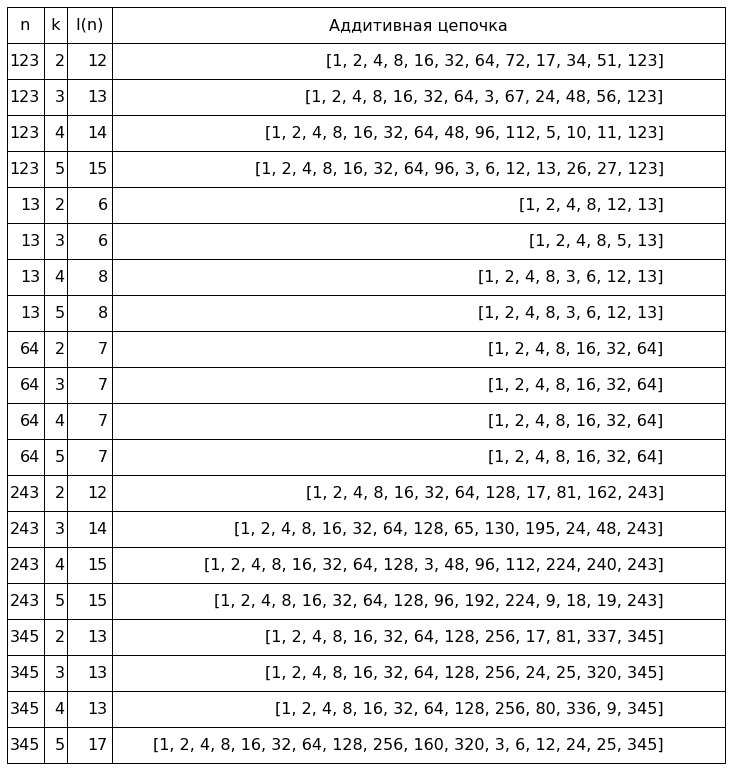

In [9]:
results = []
n_array = [123, 13, 64, 243, 345]
for n in n_array:
    for k in range(2, 6):
        temp = Yao(n, k)
        results.append([n, k, len(temp), temp])

headers = [' n ', ' k ', ' l(n) ', 'Аддитивная цепочка'] 
table = plt.table(cellText = results, colLabels = headers, loc = 'center')

table.auto_set_font_size(False)
table.set_fontsize(16)
table.auto_set_column_width(col=list(range(4)))
table.scale(3, 3) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
        
plt.box(on=None)
print('Результаты работы алгоритма Яо: ')
plt.draw()    

Таблица с минимальными аддитивными цепочками для чисел n:


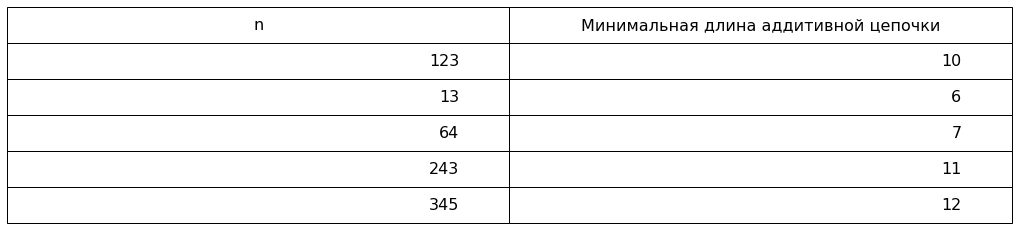

In [204]:
min_res = [[123, 10], [13, 6], [64, 7], [243, 11], [345, 12]]

headers = ['n', 'Минимальная длина аддитивной цепочки']
table = plt.table(cellText = min_res, colLabels = headers, loc = 'center')

table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(3,3)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Таблица с минимальными аддитивными цепочками для чисел n:')
plt.draw()    

**Вывод**

Реализованный алгоритм Яо в большинстве случаев не находит аддитивную цепочку минимальной длины. Также можно заметить, что в зависимости от параметра k также варьируется и длина аддитивной цепочки. В данных тестах самым оптимальным k является 2.

### 3. Алгоритм дробления вектора индексов

In [2]:
import time

def min_l(n):
    return int(log(n, 2))


def max_l(n):
    lambda_n = int(log(n, 2)) + 1
    nu_n = bin(n)[3:].count('1')
    return lambda_n + nu_n - 1


def make_chain(index_vec):
    chain = [1]
    for i in index_vec:
        chain.append(chain[-1] + chain[i - 1])
    return chain


def next_vec(vec_set, q=0):
    if (vec_set == [1 for i in range(len(vec_set))]):
        return [0 for i in range(len(vec_set))]

    for i in range(len(vec_set) - 1, -1, -1):
        if (vec_set[i] == 1):
            vec_set[i] = i + 1 + q
            continue
        vec_set[i] -= 1
        break
    return vec_set


def splitting(n):
    res = []
    if(n == 1):
        return [1]
    for m in range(min_l(n), max_l(n) + 1):
        q = m // 2
        if (q == 0):
            q = 1
        r_set = [i for i in range(1, q + 1)]
        rho_set = [q + i + 1 for i in range(m - q)]
        while (r_set != [0 for i in range(q)]):
            chain = make_chain(r_set + rho_set)
            a_min = chain[q] + (m - q)
            a_max = chain[q] * 2 ** (m - q)
            if (n < a_min or n > a_max):
                r_set = next_vec(r_set)
                continue
            if(chain[-1] == n):
                return chain
            while (rho_set != [0 for i in range(m - q)]):
                chain = make_chain(r_set + rho_set)
                if (n == chain[-1]):
                    return chain
                rho_set = next_vec(rho_set, q)
            r_set = next_vec(r_set)
            rho_set = [q + i + 1 for i in range(m - q)]
    return []
        
    

In [10]:
results = []
n_array = [513, 511, 550, 632]
for n in n_array:
    start = time.time()
    temp = splitting(n)
    end = time.time()
    results.append([n, len(temp), '{:.4f}'.format(end-start) + " секунд", temp])



Результаты работы алгоритма дробления вектора индексов: 


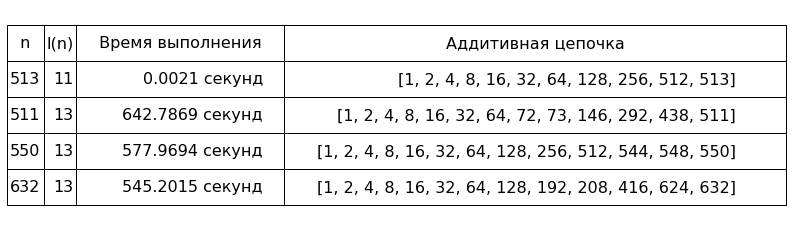

In [11]:
headers = [' n ', 'l(n)', ' Время выполнения ', 'Аддитивная цепочка'] 
table = plt.table(cellText = results, colLabels = headers, loc = 'center')

table.auto_set_font_size(False)
table.set_fontsize(16)
table.auto_set_column_width(col=list(range(4)))
table.scale(3, 3) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
        
plt.box(on=None)
print('Результаты работы алгоритма дробления вектора индексов: ')
plt.draw()    

**Вывод**

Алгоритм дробления вектора индексов всегда находит минимальную аддитивную цепочку для числа n, но поскольку алгоритм переборный, то время работы программы очень велико. 

Если сравнивать алгоритм с приведенными выше, то его стоит использовать только в том случае, если по задаче требуется минимальная аддитивная цепочка или число n не велико. Во всех других случаях лучше воспользоваться алгоритмом Яо или методом множителей. 

### 4. Проверка следствия теоремы Брауэра 

In [65]:
import pylab as plt

n = 201
l_n = [len(splitting(i)) for i in range(1, n)]
x = [i for i in range(1, n)]
x_ln = [log(i, e) for i in range(1, n)]
x_ln_2 = [log(i, e)**2 for i in range(1, n)]
y_i_power_x_ln = [l_n[i-1] * x_ln[i-1] for i in range(1, n)]

Воспользуемся логарифмической аппроксимацией методом наименьших квадратов. 

Учитывая функцию вида $y = a + b*ln(x)$

Коэффициенты могут быть найдены следующим образом:

$b = \frac{n\sum_{i=1}^{n}(y_i*ln(x_i))) - \sum_{i=1}^{n}(y_i) * \sum_{i = 1}^{n}ln(x_i))}{n\sum_{y=1}^{n}(ln(x_i)^2) - (\sum_{i = 1}^{n}(ln(x_i)))^2}$

$a = \frac{\sum_{i=1}^{n}(y_i) - b*\sum_{i=1}^{n}(ln(x_i))}{n}$

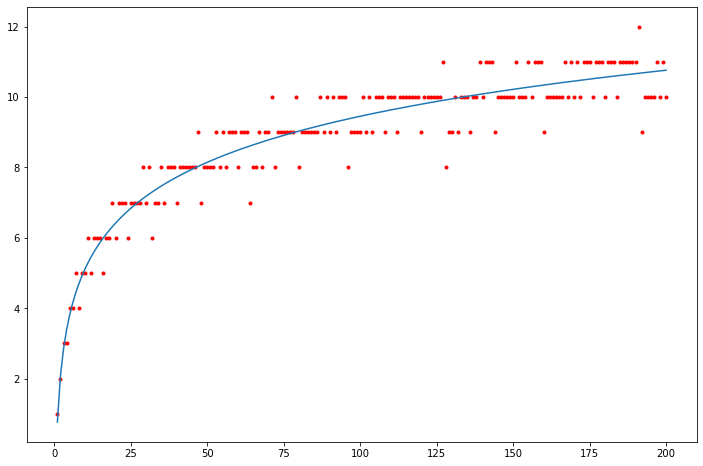

In [76]:
b = (n*sum(y_i_power_x_ln) - sum(l_n)*sum(x_ln))/(n*sum(x_ln_2) - sum(x_ln)*sum(x_ln))
a = (sum(l_n) - b * sum(x_ln))/(n-1)

y = [a + b*x_ln[i-1] for i in range(1, n)]

plt.figure(figsize=(12, 8))
plt.scatter(x, l_n, color = 'red', marker = '.')
plt.plot(x, y)
plt.show()

**Вывод**

На полученном графике можно увидеть, что логарифмическая кривая аппроксимирует точки, полученные функцией $l(n)$. Поэтому можно сделать вывод, что $l(n)$ и $\lambda(n)$ будут эквивалентны на бесконечности, что подтверждает первое следствие теоремы Брауэра. Можно также заметить, что $l(n)$ не будет сильно расти при увелечении n, так как будет расти также как логарифм. 

### 5. Проверка гипотезы Шульца-Брауэра для $n \leq 10$

In [227]:
left = [len(splitting(2**i - 1)) for i in range(2, 11)]
right = [len(splitting(i)) + i - 1 for i in range(2, 11)]

Проверка гипотезы Шульца-Брауэра: 


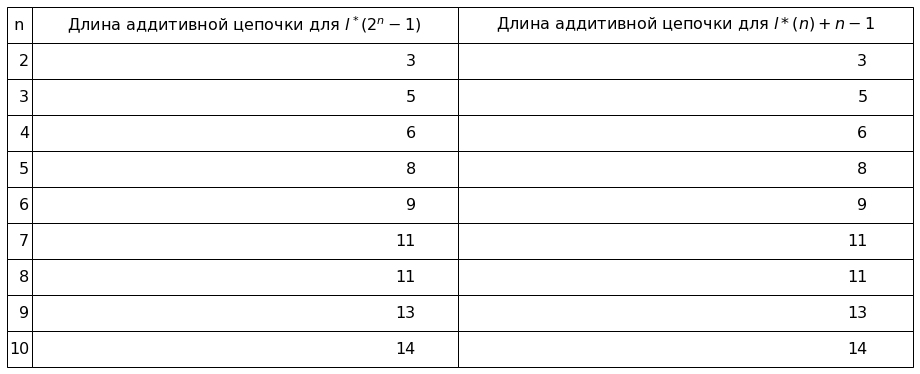

In [235]:
results = []
for i in range(9):
    results.append([i + 2, left[i], right[i]])

headers = [' n ', 'Длина аддитивной цепочки для $l^*(2^n-1)$ ', 'Длина аддитивной цепочки для $l*(n) + n - 1$'] 
table = plt.table(cellText = results, colLabels = headers, loc = 'center')

table.auto_set_font_size(False)
table.set_fontsize(16)
table.auto_set_column_width(col=list(range(4)))
table.scale(3, 3) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
        
plt.box(on=None)
print('Проверка гипотезы Шульца-Брауэра: ')
plt.draw()    


**Вывод**

По результатам эксперимента можно сделать вывод, что гипотеза Шульца-Брауэра является верной для $n \leq 10. Предподсчет длины минимальной аддитивной цепочки часто может ускорить работу переборного алгоритма.

### Общий вывод о проделанной работе

Сформировано представление о аддитивных цепочках.
Разработаны алгоритмы для нахождения аддитивных цепочек для заданного числа: 
<ol>
<li>Бинарный метод</li>  
<li>Метод множителей</li>  
<li>Алгоритм Яо</li>  
<li>Алгоритм дробления вектора индексов(нахождения минимальной аддитивной цепочки)</li>  
</ol>
Было практически доказано первое следствие теоремы Брауэра, а также проверена гипотеза Шульца-Брауэра для $n \leq 10$.
Получен навык использования систем компьютерной алгебры для реализации алгоритмов. 